In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn import preprocessing

from main import propagate, optimize, model, predict

In [28]:
df = pd.read_csv('../datasets/CarPrice.csv')

In [29]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [30]:
df.drop(columns=['CarName','car_ID', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem', 'doornumber', 'enginetype', 'cylindernumber'], inplace=True)

In [31]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [32]:
# pre_process = preprocessing.StandardScaler()
#normalization of data
df_norm = (df - df.mean()) / (df.max() - df.min())

# Putting feature variable to X
X = df_norm[['symboling','wheelbase','carlength',
             'carwidth','curbweight', 'enginesize', 
             'boreratio', 'stroke', 'compressionratio',
            'horsepower', 'peakrpm', 'citympg', 'highwaympg'
            ]]

# Putting response variable to y
y = df_norm['price']


# X = pd.DataFrame(pre_process.fit_transform(X))

#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=2)

In [33]:
df_norm.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.433171,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.011671,0.100174,-0.274007,-0.071409,0.028679,-0.051070,-0.117209,-0.098716,0.005419
1,0.433171,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.011671,0.100174,-0.274007,-0.071409,0.028679,-0.051070,-0.117209,-0.098716,0.080018
2,0.033171,-0.124099,-0.042526,-0.033984,-0.110407,0.103737,0.094689,-0.464111,0.102184,-0.071409,0.207846,-0.051070,-0.172764,-0.125032,0.080018
3,0.233171,0.030420,0.038071,0.024350,0.047927,-0.084781,-0.067575,-0.099826,0.068850,-0.008909,-0.008821,0.153011,-0.033875,-0.019769,0.016714
4,0.233171,0.018758,0.038071,0.041016,0.047927,0.104125,0.034312,-0.099826,0.068850,-0.133909,0.045346,0.153011,-0.200542,-0.230295,0.103602


In [34]:
X_train.head()

,symboling,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
78,0.233171,-0.147422,-0.249989,-0.125650,-0.213951,-0.131726,-0.256969,-0.012102,-0.046409,-0.150488,0.153011,0.160569,0.190757
5,0.233171,0.030420,0.048518,0.032683,-0.018839,0.034312,-0.099826,0.068850,-0.102659,0.024512,0.153011,-0.172764,-0.151348
198,-0.566829,0.161616,0.220160,0.107683,0.189850,0.011671,0.207317,-0.050197,-0.165159,0.241179,-0.010254,-0.228320,-0.230295
151,0.033171,-0.089113,-0.229094,-0.192317,-0.199987,-0.131726,-0.199826,-0.107340,-0.071409,-0.175488,-0.132703,0.160569,0.190757
11,-0.166829,0.071237,0.041056,-0.092317,-0.062283,-0.071348,0.121603,-0.216864,-0.083909,-0.012988,0.275460,-0.061653,-0.046085


In [35]:
y_train.head()

78    -0.164036
5      0.048987
198    0.127682
151   -0.172253
11     0.090569
Name: price, dtype: float64

In [36]:
model1 = model(X_train=X_train, Y_train=y_train, X_test=X_test, Y_test=y_test, num_iterations = 500, learning_rate = 0.001)

model2 = model(X_train=X_train, Y_train=y_train, X_test=X_test, Y_test=y_test, num_iterations = 500, learning_rate = 0.01)

model3 = model(X_train=X_train, Y_train=y_train, X_test=X_test, Y_test=y_test, num_iterations = 500, learning_rate = 0.1)

model4 = model(X_train=X_train, Y_train=y_train, X_test=X_test, Y_test=y_test, num_iterations = 500, learning_rate = 0.3)

train accuracy: 86.01858345496967 %
test accuracy: 87.87976982112615 %
train accuracy: 92.12003828694046 %
test accuracy: 92.61457147880547 %
train accuracy: 94.01134004158904 %
test accuracy: 93.467373834547 %
train accuracy: 94.66063706677433 %
test accuracy: 93.66642629959652 %


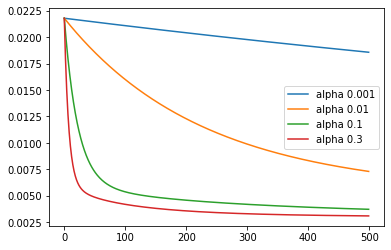

In [37]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(500)], model1['costs'])
plt.plot([i for i in range(500)], model2['costs'])
plt.plot([i for i in range(500)], model3['costs'])
plt.plot([i for i in range(500)], model4['costs'])

plt.gca().legend(('alpha 0.001','alpha 0.01', 'alpha 0.1', 'alpha 0.3'))
plt.show()